<a href="https://colab.research.google.com/github/SikiruKilaniOlanrewaju/Predictive-Maintenance-in-Industrial-Machinery/blob/main/Predictive_Maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Define the number of records and machines
num_records = 5000
num_machines = 10

# Randomly generate machine details
machine_ids = np.random.choice(range(1, num_machines + 1), size=num_records)
machine_types = np.random.choice(['Filling', 'Packaging', 'Sealing'], size=num_records)
runtime = np.random.uniform(100, 10000, size=num_records)  # in hours
temperature = np.random.uniform(60, 90, size=num_records)  # in degrees Celsius
vibration = np.random.uniform(0.5, 5.0, size=num_records)  # in g-force
pressure = np.random.uniform(10, 50, size=num_records)     # in psi
power_consumption = np.random.uniform(100, 500, size=num_records)  # in kW

# Maintenance history and failures
maintenance_history = np.random.choice([0, 1], size=num_records, p=[0.8, 0.2])
downtime = maintenance_history * np.random.uniform(1, 10, size=num_records)  # downtime in hours
failures = np.random.choice([0, 1], size=num_records, p=[0.9, 0.1])  # 10% failure rate

# Predictive maintenance label - Remaining useful life
remaining_useful_life = np.where(failures == 1, np.random.uniform(0, 500, size=num_records), np.random.uniform(500, 1000, size=num_records))

# Ambient temperature
ambient_temperature = np.random.uniform(20, 40, size=num_records)

# Create a DataFrame
data = pd.DataFrame({
    'Machine_ID': machine_ids,
    'Machine_Type': machine_types,
    'Runtime': runtime,
    'Temperature': temperature,
    'Vibration': vibration,
    'Pressure': pressure,
    'Power_Consumption': power_consumption,
    'Maintenance_History': maintenance_history,
    'Downtime': downtime,
    'Failures': failures,
    'Remaining_Useful_Life': remaining_useful_life,
    'Ambient_Temperature': ambient_temperature
})

# Display the first few rows of the dataset
data.head()


,Machine_ID,Machine_Type,Runtime,Temperature,Vibration,Pressure,Power_Consumption,Maintenance_History,Downtime,Failures,Remaining_Useful_Life,Ambient_Temperature
0,7,Sealing,6566.553173,74.883651,0.665550,38.050919,209.748598,0,0.0,0,632.557007,35.390334
1,4,Packaging,3555.619002,72.927617,4.168720,35.851286,428.760901,0,0.0,0,633.456781,39.443937
2,8,Sealing,9665.634684,88.630938,1.077148,17.134947,494.769430,0,0.0,0,968.517304,27.108116
3,5,Filling,8036.032911,66.171745,2.156175,48.747631,285.545612,0,0.0,0,845.114619,20.295214
4,7,Packaging,6341.134422,69.350498,2.647299,24.161024,228.708278,0,0.0,1,266.119195,38.737649


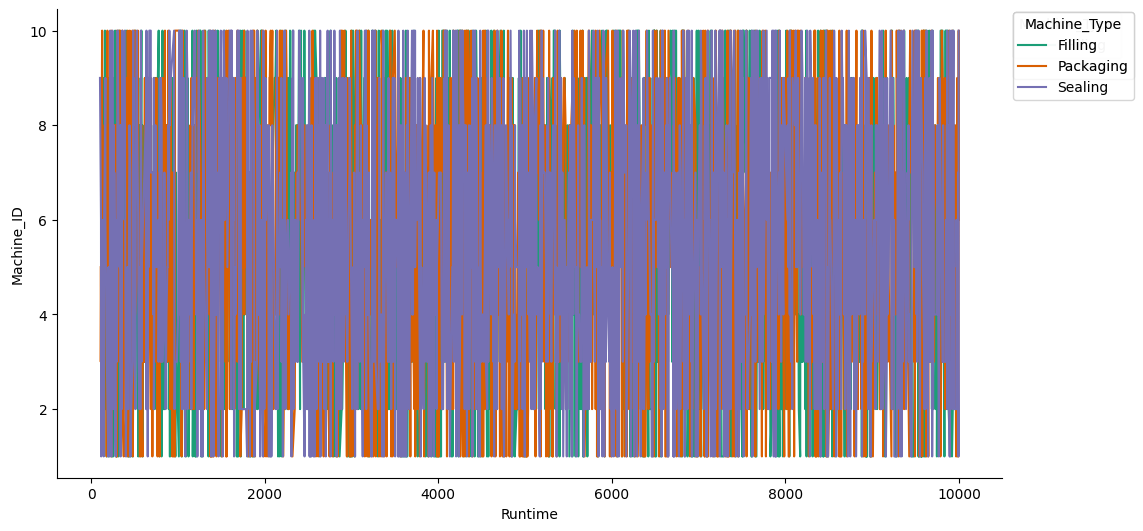

In [7]:
# @title Runtime vs Machine_ID

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Runtime']
  ys = series['Machine_ID']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Runtime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Machine_Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Machine_Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Runtime')
_ = plt.ylabel('Machine_ID')

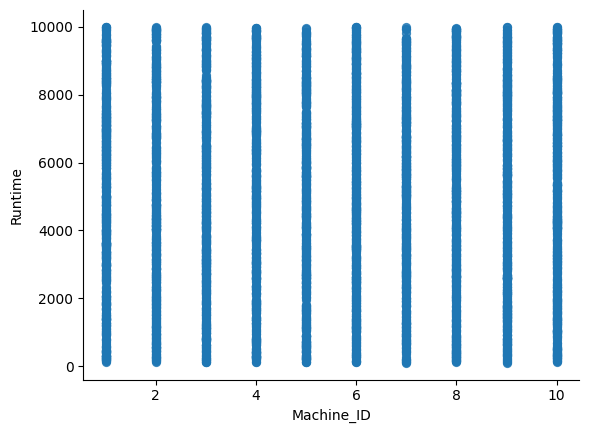

In [6]:
# @title Machine_ID vs Runtime

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Machine_ID', y='Runtime', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

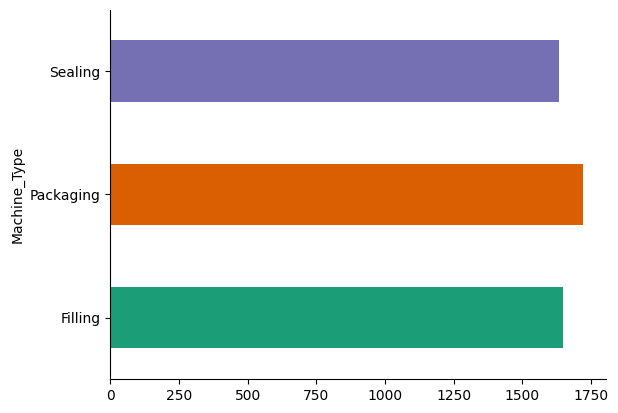

In [5]:
# @title Machine_Type

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Machine_Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

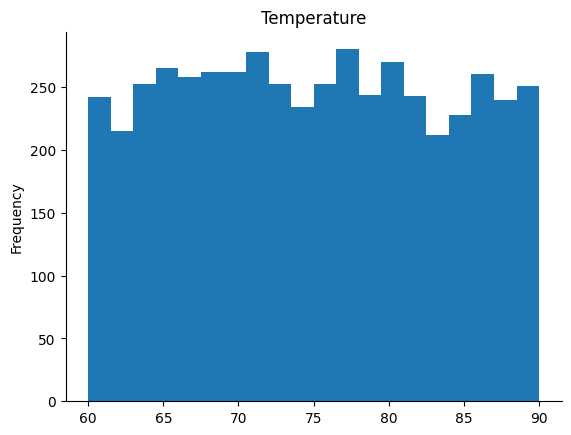

In [4]:
# @title Temperature

from matplotlib import pyplot as plt
data['Temperature'].plot(kind='hist', bins=20, title='Temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

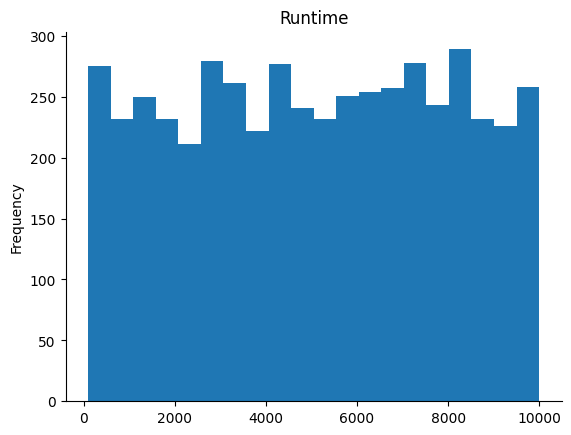

In [3]:
# @title Runtime

from matplotlib import pyplot as plt
data['Runtime'].plot(kind='hist', bins=20, title='Runtime')
plt.gca().spines[['top', 'right',]].set_visible(False)

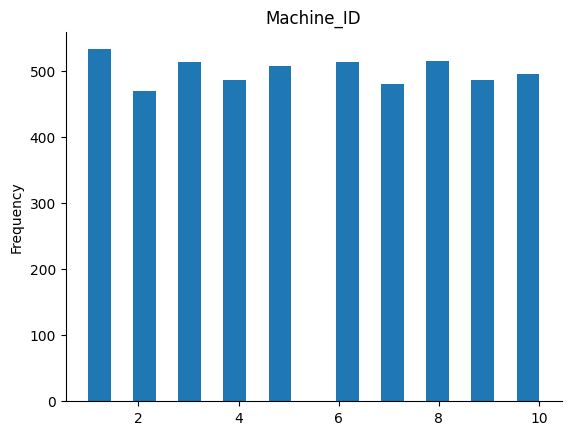

In [2]:
# @title Machine_ID

from matplotlib import pyplot as plt
data['Machine_ID'].plot(kind='hist', bins=20, title='Machine_ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

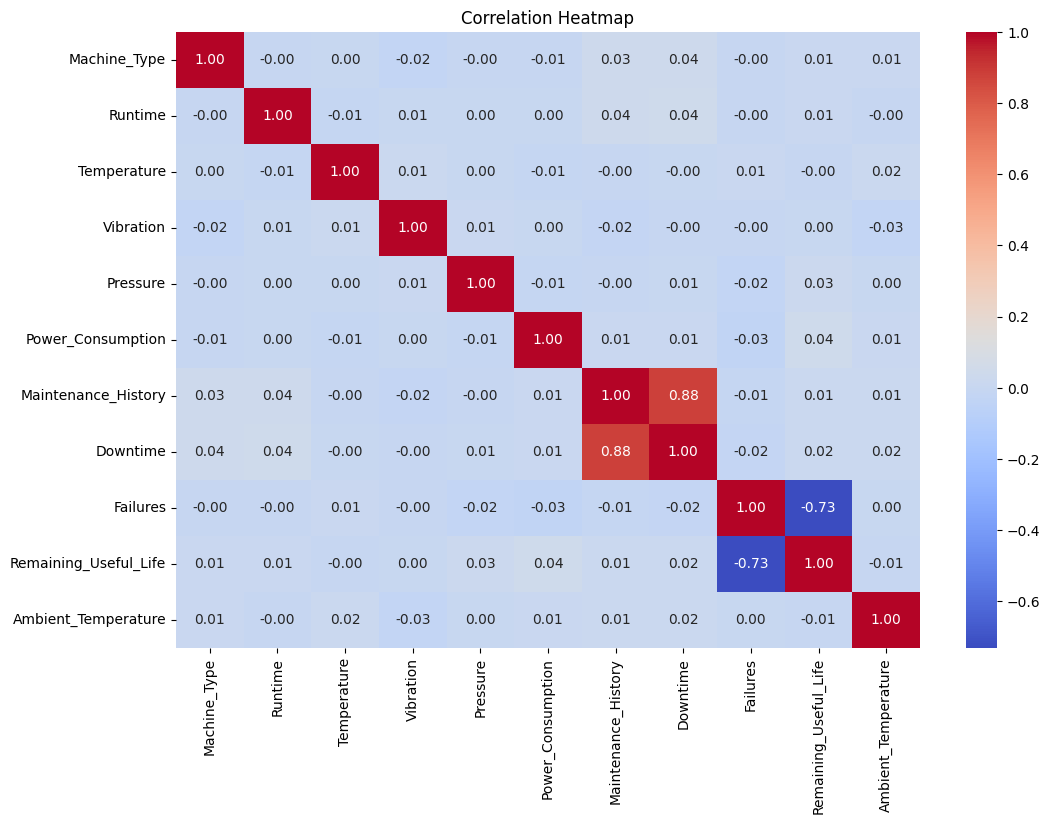

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Drop Machine_ID as it's an identifier, not useful for correlation
data_for_corr = data.drop(columns=['Machine_ID'])

# Encode the Machine_Type (categorical feature)
encoder = LabelEncoder()
data_for_corr['Machine_Type'] = encoder.fit_transform(data_for_corr['Machine_Type'])

# Now we can compute the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(data_for_corr.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Label encode machine types
encoder = LabelEncoder()
data['Machine_Type'] = encoder.fit_transform(data['Machine_Type'])

# Scale continuous variables
scaler = StandardScaler()
scaled_features = ['Runtime', 'Temperature', 'Vibration', 'Pressure', 'Power_Consumption', 'Ambient_Temperature']
data[scaled_features] = scaler.fit_transform(data[scaled_features])

# Display processed data
data.head()

,Machine_ID,Machine_Type,Runtime,Temperature,Vibration,Pressure,Power_Consumption,Maintenance_History,Downtime,Failures,Remaining_Useful_Life,Ambient_Temperature
0,7,2,0.523644,-0.005934,-1.597398,0.685990,-0.800190,0,0.0,0,632.557007,0.926642
1,4,1,-0.530236,-0.234540,1.091176,0.495978,1.105594,0,0.0,0,633.456781,1.628844
2,8,2,1.608378,1.600740,-1.281509,-1.120810,1.679982,0,0.0,0,968.517304,-0.508078
3,5,0,1.037988,-1.024112,-0.453390,1.610013,-0.140625,0,0.0,0,845.114619,-1.688270
4,7,1,0.444744,-0.652605,-0.076467,-0.513871,-0.635208,0,0.0,1,266.119195,1.506495


In [11]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = data.drop(columns=['Remaining_Useful_Life', 'Failures'])  # Predictive features
y = data['Failures']  # Target variable (failure prediction)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 89.90%
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       899
           1       0.00      0.00      0.00       101

    accuracy                           0.90      1000
   macro avg       0.45      0.50      0.47      1000
weighted avg       0.81      0.90      0.85      1000

Confusion Matrix:
[[899   0]
 [101   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


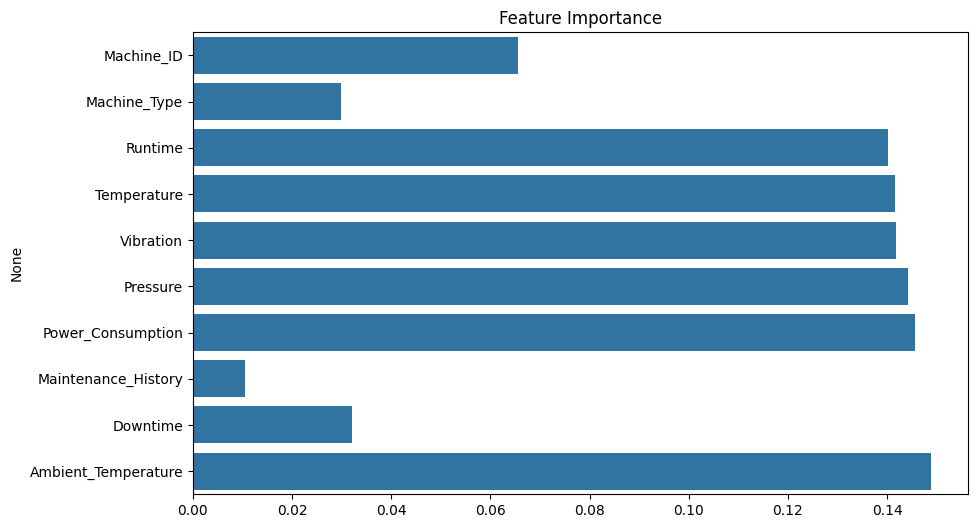

In [14]:
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.show()

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Features and target for regression
X_reg = data.drop(columns=['Remaining_Useful_Life'])
y_reg = data['Remaining_Useful_Life']

# Train-test split for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Initialize and train Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_reg, y_train_reg)

# Predict on test data
y_pred_reg = regressor.predict(X_test_reg)

# Evaluate the regression model
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f'Mean Squared Error: {mse:.2f}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mean Squared Error: 21745.39


In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM model
svm_model = SVC(kernel='rbf', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test data
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm * 100:.2f}%')

# Classification report
print(classification_report(y_test, y_pred_svm))

# Confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix (SVM):")
print(conf_matrix_svm)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SVM Accuracy: 89.90%
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       899
           1       0.00      0.00      0.00       101

    accuracy                           0.90      1000
   macro avg       0.45      0.50      0.47      1000
weighted avg       0.81      0.90      0.85      1000

Confusion Matrix (SVM):
[[899   0]
 [101   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model with k=5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test data
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn * 100:.2f}%')

# Classification report
print(classification_report(y_test, y_pred_knn))

# Confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix (KNN):")
print(conf_matrix_knn)

KNN Accuracy: 89.40%
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       899
           1       0.14      0.01      0.02       101

    accuracy                           0.89      1000
   macro avg       0.52      0.50      0.48      1000
weighted avg       0.82      0.89      0.85      1000

Confusion Matrix (KNN):
[[893   6]
 [100   1]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gbc_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gbc_model.fit(X_train, y_train)

# Predict on the test data
y_pred_gbc = gbc_model.predict(X_test)

# Evaluate the model
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
print(f'Gradient Boosting Accuracy: {accuracy_gbc * 100:.2f}%')

# Classification report
print(classification_report(y_test, y_pred_gbc))

# Confusion matrix
conf_matrix_gbc = confusion_matrix(y_test, y_pred_gbc)
print("Confusion Matrix (Gradient Boosting):")
print(conf_matrix_gbc)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Gradient Boosting Accuracy: 89.70%
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       899
           1       0.00      0.00      0.00       101

    accuracy                           0.90      1000
   macro avg       0.45      0.50      0.47      1000
weighted avg       0.81      0.90      0.85      1000

Confusion Matrix (Gradient Boosting):
[[897   2]
 [101   0]]


In [23]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)

# Predict on the test data
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Logistic Regression Accuracy: {accuracy_logreg * 100:.2f}%')

# Classification report
print(classification_report(y_test, y_pred_logreg))

# Confusion matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix (Logistic Regression):")
print(conf_matrix_logreg)

Logistic Regression Accuracy: 89.90%
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       899
           1       0.00      0.00      0.00       101

    accuracy                           0.90      1000
   macro avg       0.45      0.50      0.47      1000
weighted avg       0.81      0.90      0.85      1000

Confusion Matrix (Logistic Regression):
[[899   0]
 [101   0]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python

In [25]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb * 100:.2f}%')

# Classification report
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix (XGBoost):")
print(conf_matrix_xgb)

XGBoost Accuracy: 89.90%
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       899
           1       0.00      0.00      0.00       101

    accuracy                           0.90      1000
   macro avg       0.45      0.50      0.47      1000
weighted avg       0.81      0.90      0.85      1000

Confusion Matrix (XGBoost):
[[899   0]
 [101   0]]


In [27]:
from sklearn.model_selection import GridSearchCV

# Set up parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(f'Best parameters found: {grid_search.best_params_}')

# Evaluate the best model
y_pred_xgb_tuned = grid_search.predict(X_test)
accuracy_xgb_tuned = accuracy_score(y_test, y_pred_xgb_tuned)
print(f'Tuned XGBoost Accuracy: {accuracy_xgb_tuned * 100:.2f}%')

# Classification report
print(classification_report(y_test, y_pred_xgb_tuned))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best parameters found: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Tuned XGBoost Accuracy: 89.90%
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       899
           1       0.00      0.00      0.00       101

    accuracy                           0.90      1000
   macro avg       0.45      0.50      0.47      1000
weighted avg       0.81      0.90      0.85      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")
print(f"Gradient Boosting Accuracy: {accuracy_gbc * 100:.2f}%")
print(f"Logistic Regression Accuracy: {accuracy_logreg * 100:.2f}%")
print(f"XGBoost Accuracy: {accuracy_xgb * 100:.2f}%")
print(f"Tuned XGBoost Accuracy: {accuracy_xgb_tuned * 100:.2f}%")

Random Forest Accuracy: 89.90%
SVM Accuracy: 89.90%
KNN Accuracy: 89.40%
Gradient Boosting Accuracy: 89.70%
Logistic Regression Accuracy: 89.90%
XGBoost Accuracy: 89.90%
Tuned XGBoost Accuracy: 89.90%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


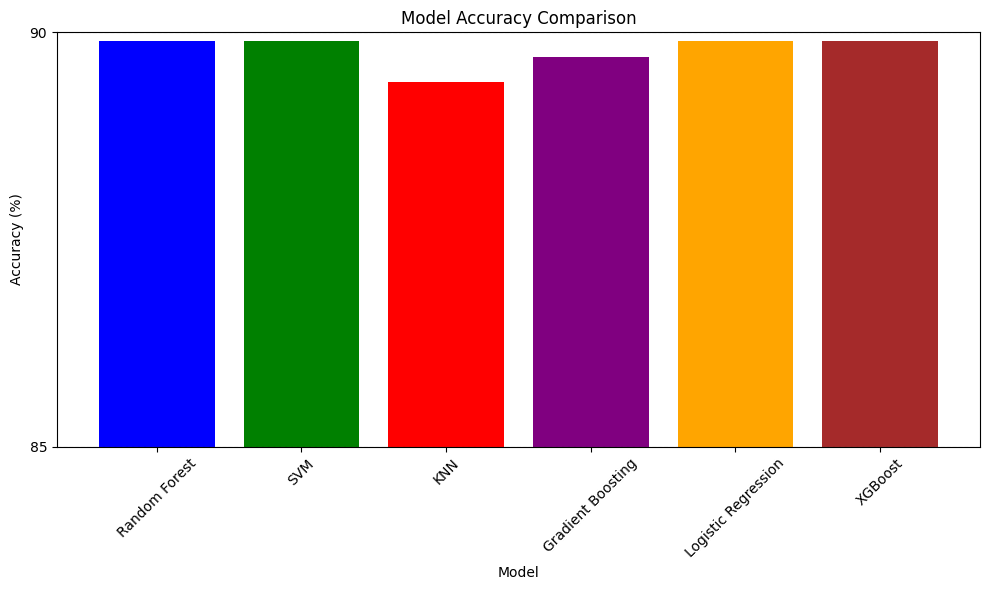

In [38]:
import matplotlib.pyplot as plt

# Define the accuracy scores for each model
models = [
    'Random Forest',
    'SVM',
    'KNN',
    'Gradient Boosting',
    'Logistic Regression',
    'XGBoost'
]

accuracies = [
    89.90,  # Accuracy for Random Forest
    89.90,  # Accuracy for SVM
    89.40,  # Accuracy for KNN
    89.70,  # Accuracy for Gradient Boosting
    89.90,  # Accuracy for Logistic Regression
    89.90   # Accuracy for XGBoost
]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'brown'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim(85, 90)  # Adjust y-axis limit for better visualization

# Set y-axis ticks to intervals of 5%
plt.yticks(range(85, 91, 5))

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the chart
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


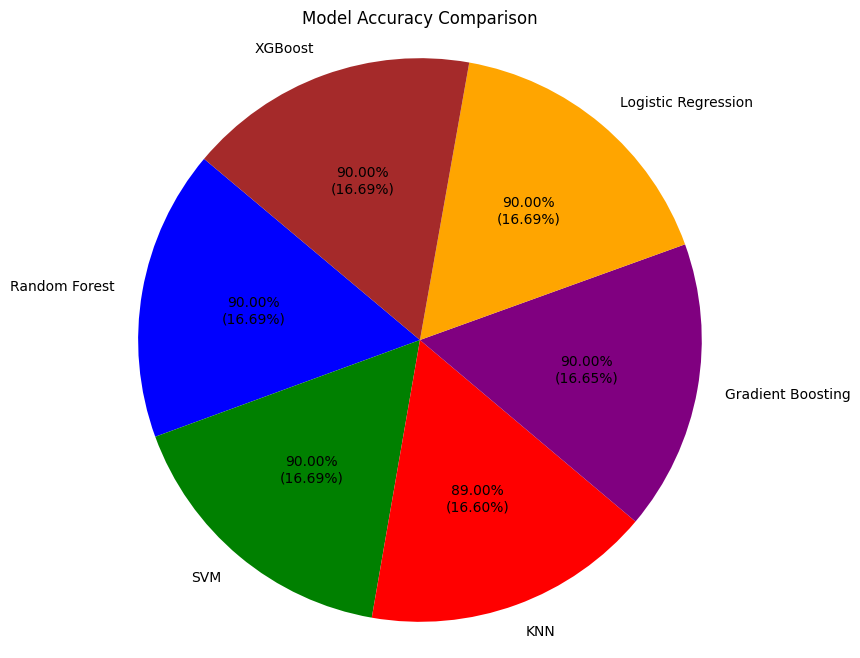

In [43]:
import matplotlib.pyplot as plt

# Define the accuracy scores for each model
models = [
    'Random Forest',
    'SVM',
    'KNN',
    'Gradient Boosting',
    'Logistic Regression',
    'XGBoost'
]

accuracies = [
    89.90,  # Accuracy for Random Forest
    89.90,  # Accuracy for SVM
    89.40,  # Accuracy for KNN
    89.70,  # Accuracy for Gradient Boosting
    89.90,  # Accuracy for Logistic Regression
    89.90   # Accuracy for XGBoost
]

# Create a pie chart with accuracy values
plt.figure(figsize=(8, 8))

# Function to format the label with accuracy
def func(pct, allvalues):
    absolute = int(round(pct / 100. * sum(allvalues)))
    return f'{absolute:.2f}%\n({pct:.2f}%)'

plt.pie(accuracies, labels=models, autopct=lambda pct: func(pct, accuracies), colors=['blue', 'green', 'red', 'purple', 'orange', 'brown'], startangle=140)
plt.title('Model Accuracy Comparison')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the chart
plt.show()